# Mid Season Review

In this notebook I'll be trying to answer a few questions about the performance of players according to Biwenger prices and points (Sofascore) with the data I've collected up to matchday 19 (not every single day is available). I'll be using Pandas.

In [1]:
import pandas as pd

First, the usual exploratory data analysis

In [43]:
df = pd.read_csv("../all_data.csv")
df_copy = df

In [15]:
df.shape

(17865, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17865 entries, 0 to 17864
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      17865 non-null  object 
 1   Team      17865 non-null  object 
 2   Player    17865 non-null  object 
 3   Position  17865 non-null  object 
 4   Points    17865 non-null  int64  
 5   Price     17865 non-null  int64  
 6   GP        17865 non-null  int64  
 7   Home      17865 non-null  int64  
 8   Away      17865 non-null  int64  
 9   Average   17865 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.4+ MB


In [5]:
df.head()

,Date,Team,Player,Position,Points,Price,GP,Home,Away,Average
0,2025-07-11,Liverpool,Salah,Forward,0,16610000,0,0,0,0.0
1,2025-07-11,Chelsea,Cole Palmer,Midfielder,0,16000000,0,0,0,0.0
2,2025-07-11,Liverpool,Florian Wirtz,Midfielder,0,14920000,0,0,0,0.0
3,2025-07-11,Newcastle,Isak,Forward,0,14340000,0,0,0,0.0
4,2025-07-11,Brentford FC,Mbeumo,Forward,0,14220000,0,0,0,0.0


In [6]:
df.describe()

,Points,Price,GP,Home,Away,Average
count,17865.000000,1.786500e+04,17865.000000,17865.000000,17865.000000,17865.000000
mean,14.810411,2.193893e+06,3.705234,1.848419,1.856815,1.887356
std,22.751354,2.693253e+06,4.878562,2.480234,2.477685,2.211714
min,-1.000000,1.500000e+05,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,3.800000e+05,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.240000e+06,1.000000,0.000000,0.000000,0.000000
75%,23.000000,2.950000e+06,7.000000,3.000000,3.000000,3.500000
max,207.000000,2.116000e+07,21.000000,11.000000,11.000000,13.380000


In [7]:
# Check for missing values in each colum
df.isna().sum()

Date        0
Team        0
Player      0
Position    0
Points      0
Price       0
GP          0
Home        0
Away        0
Average     0
dtype: int64

Everything seems to be fine with the dataset :)

## Cleaning

To keep relevant information only, let's drop all players who have played less than the average (GP = 4), to establish a simple filter:

In [44]:
below_avg_GP = (
    df.groupby("Player")["GP"]
      .max()
      .loc[lambda x: x < 4]
      .index
      .tolist()
)

df = df[~df["Player"].isin(below_avg_GP)]

df.shape

(12558, 10)

Now drop every row before the day Premier League started (15-08-2025):

In [47]:
df["Date"] = pd.to_datetime(df["Date"])
df = df[df["Date"] > "15-08-2025"]
df.shape

(8941, 10)

We went from more than 17000 rows to 8941. That's a major cleaning, but it does help to visualize relevant data, i.e., that affected by the dynamics of matchdays.

In [48]:
latest = df[df["Date"]==df["Date"].max()]
latest.shape

(422, 10)

The whole dataset contains information of 422 players, which is decent, I think.

## Distributions

Now let's look at distributions. Since there are several entries for the same list of players depending on the date, I'll create a separate dataframe with summarized features for each player. I'll show the original distributions first anyways: 

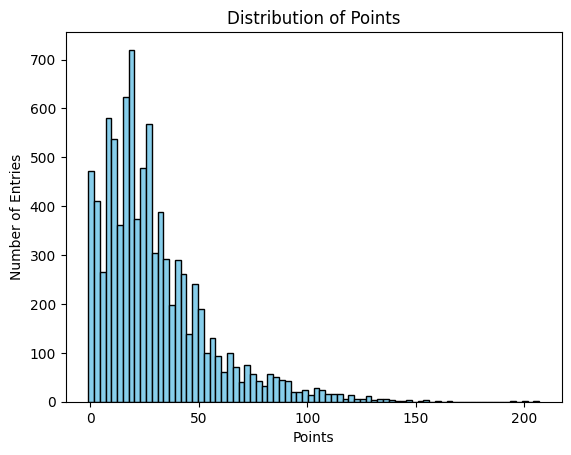

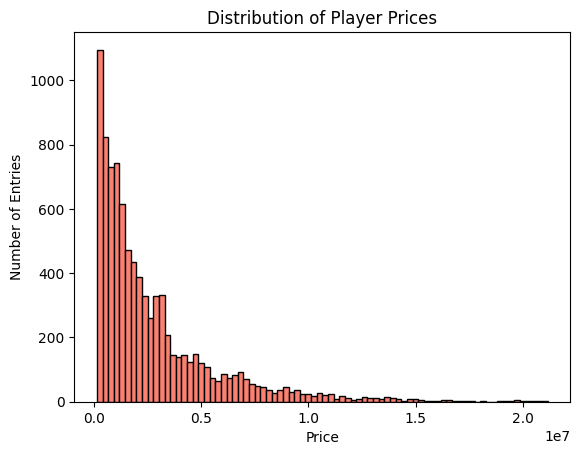

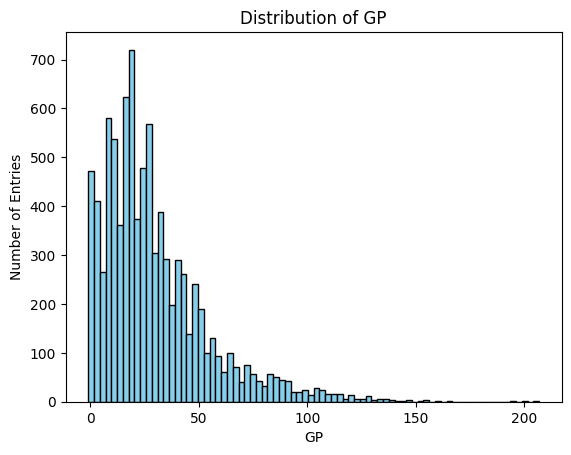

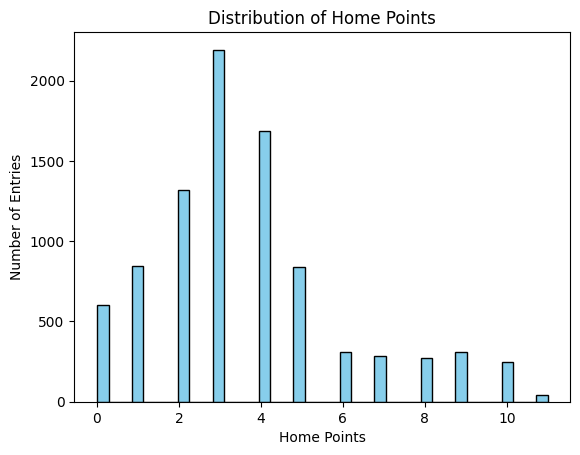

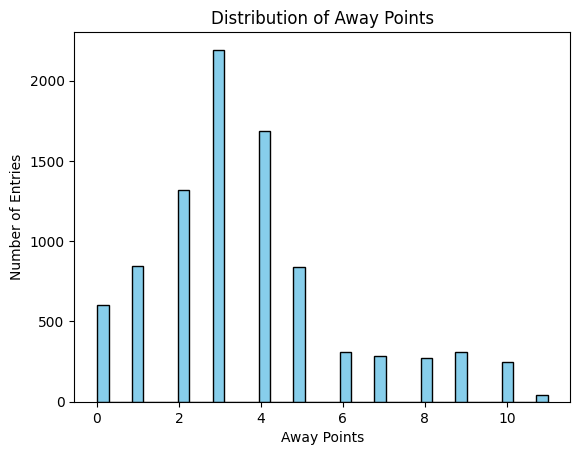

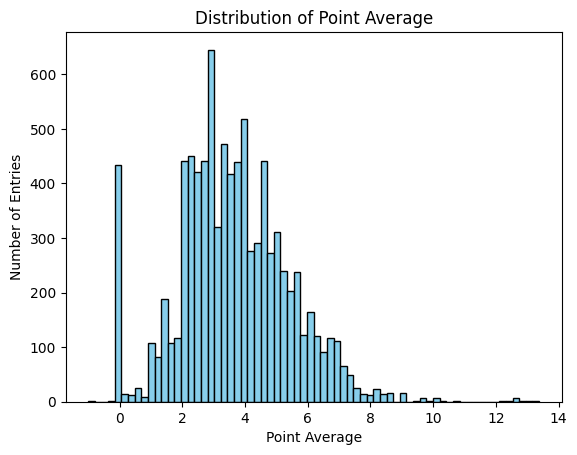

In [50]:
import matplotlib.pyplot as plt
# Plot Points original distribution
plt.hist(df['Points'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Price original distribution
plt.hist(df['Price'], bins="auto", color='salmon', edgecolor='black')
plt.title('Distribution of Player Prices')
plt.xlabel('Price')
plt.ylabel('Number of Entries')
plt.show()

# GP original distribution
plt.hist(df['Points'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of GP')
plt.xlabel('GP')
plt.ylabel('Number of Entries')
plt.show()

# Plot Home distribution
plt.hist(df['Home'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Home Points')
plt.xlabel('Home Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Away distribution
plt.hist(df['Home'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Away Points')
plt.xlabel('Away Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Point Average distribution
plt.hist(df['Average'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Point Average')
plt.xlabel('Point Average')
plt.ylabel('Number of Entries')
plt.show()

As you can see, they're skewed towards the left. However, the cleaning made it possible to get somewhat manageable distributions. You can verify yourself skipping it and plotting the distributions:

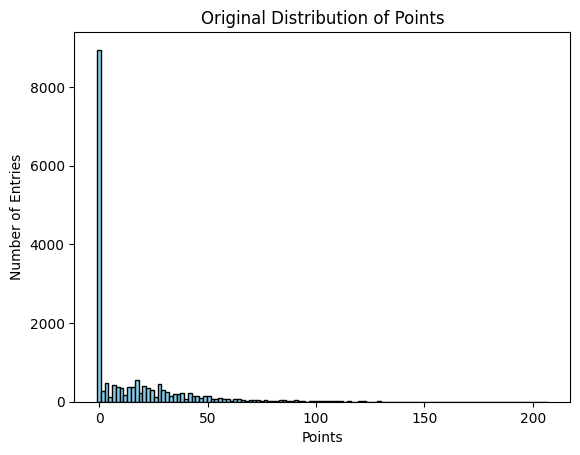

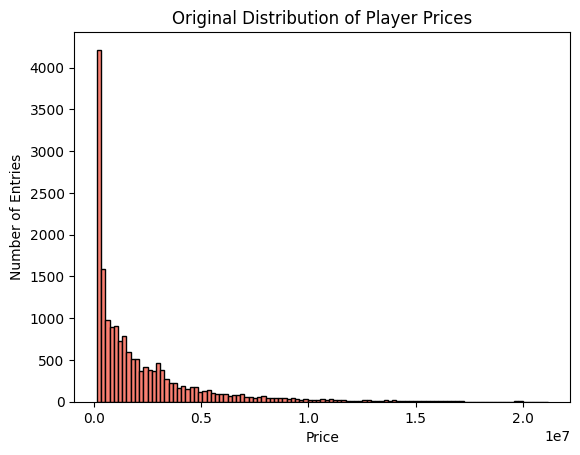

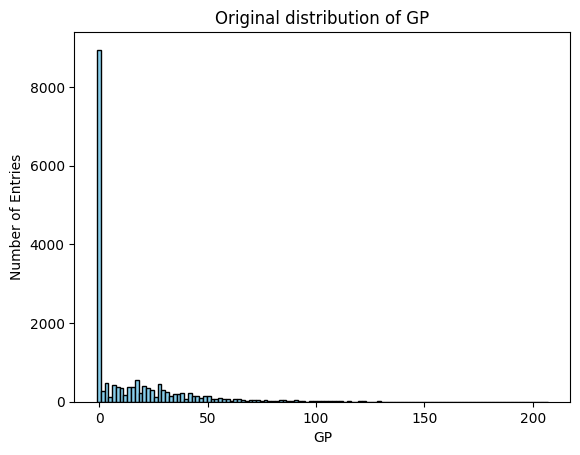

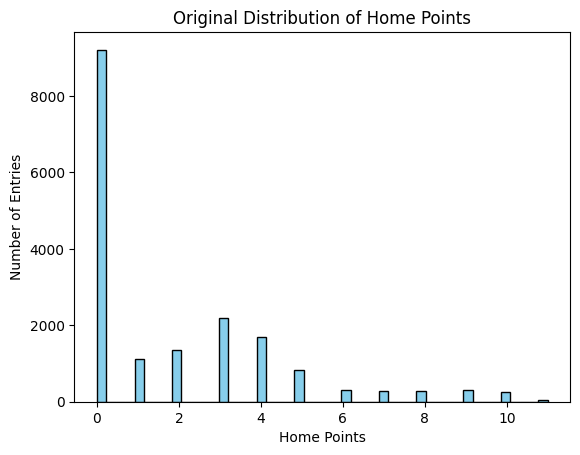

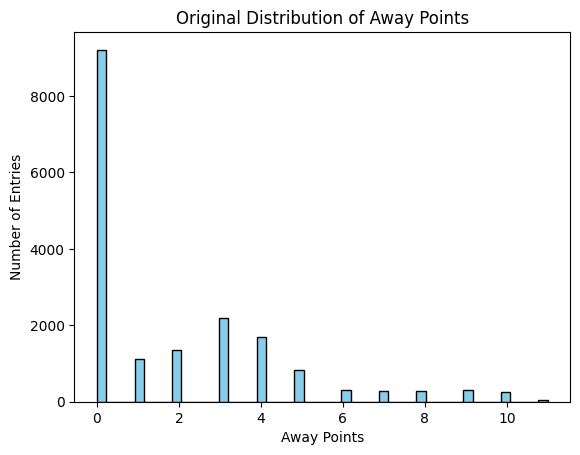

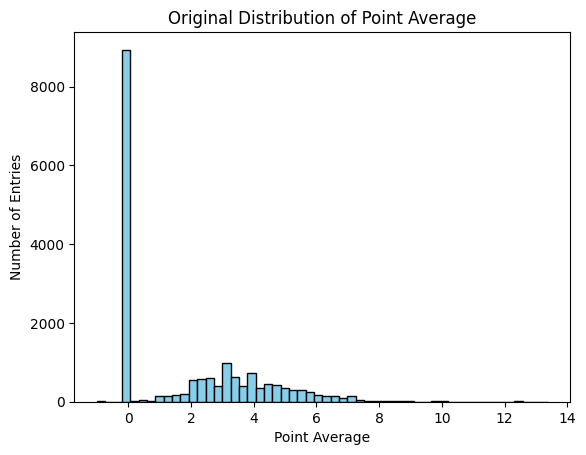

In [51]:
import matplotlib.pyplot as plt
# Plot Points original distribution
plt.hist(df_copy['Points'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Original Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Price original distribution
plt.hist(df_copy['Price'], bins="auto", color='salmon', edgecolor='black')
plt.title('Original Distribution of Player Prices')
plt.xlabel('Price')
plt.ylabel('Number of Entries')
plt.show()

# GP original distribution
plt.hist(df_copy['Points'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Original distribution of GP')
plt.xlabel('GP')
plt.ylabel('Number of Entries')
plt.show()

# Plot Home distribution
plt.hist(df_copy['Home'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Original Distribution of Home Points')
plt.xlabel('Home Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Away distribution
plt.hist(df_copy['Home'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Original Distribution of Away Points')
plt.xlabel('Away Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Point Average distribution
plt.hist(df_copy['Average'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Original Distribution of Point Average')
plt.xlabel('Point Average')
plt.ylabel('Number of Entries')
plt.show()

To try and get a bit more information, I'll adjust the data for each distribution. 

For the price, it's actually useful to use the average of all entries in `df`.

In [52]:
ps = df.groupby('Player').agg({ #player summary
    'Points':'mean',
    'Price':'mean',
    'GP':'mean',
    'Average':'mean'
}).reset_index()

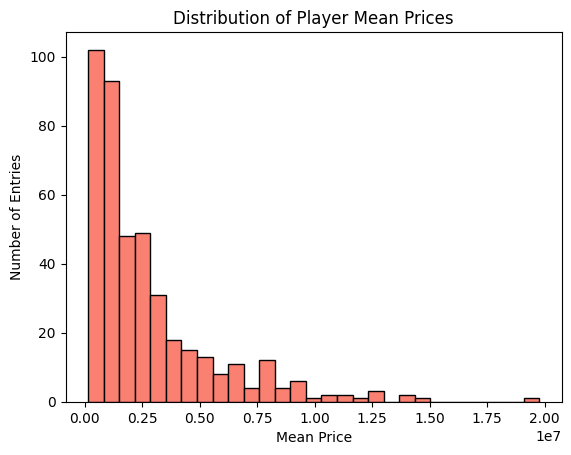

In [53]:
# Plot Price distribution
plt.hist(ps['Price'], bins="auto", color='salmon', edgecolor='black')
plt.title('Distribution of Player Mean Prices')
plt.xlabel('Mean Price')
plt.ylabel('Number of Entries')
plt.show()

Looks similar to the original. 

We can also filter the latest date available:

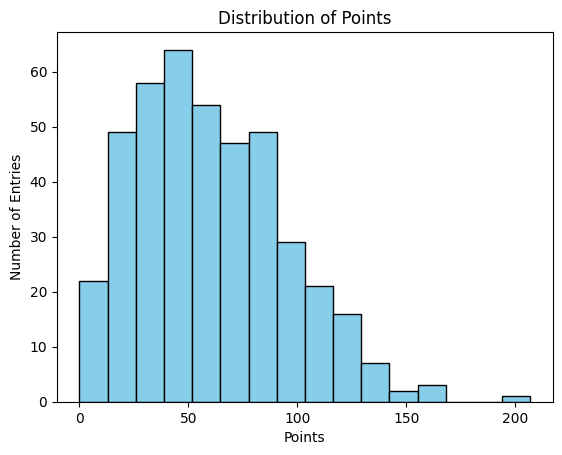

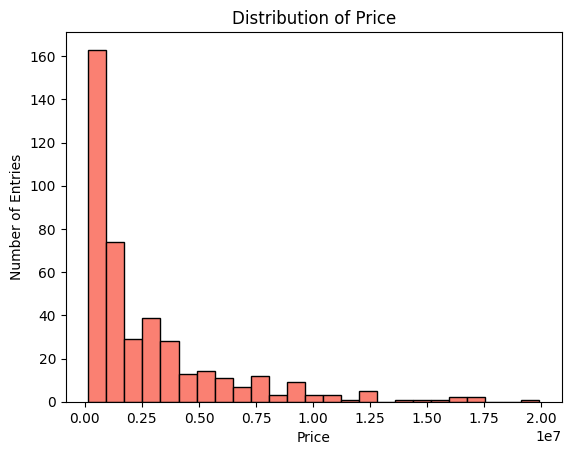

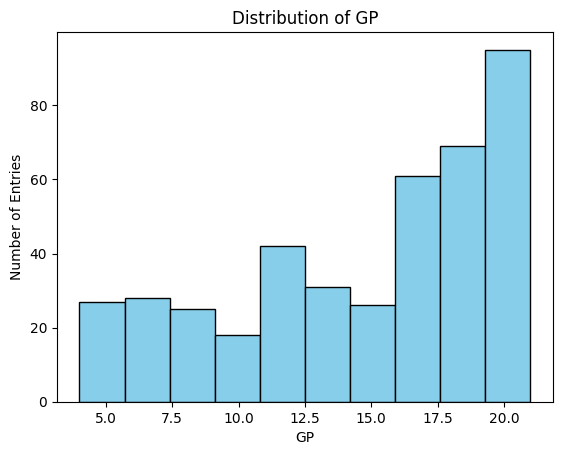

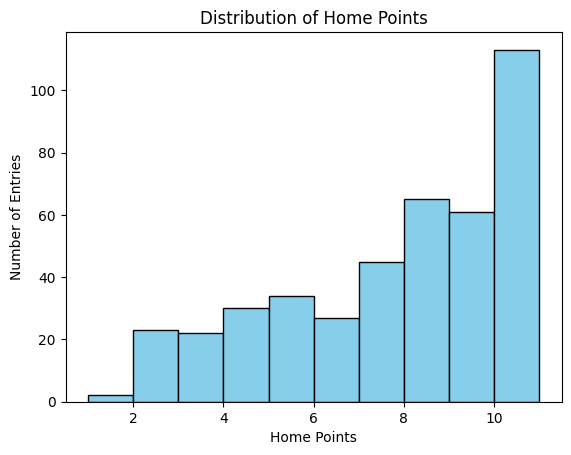

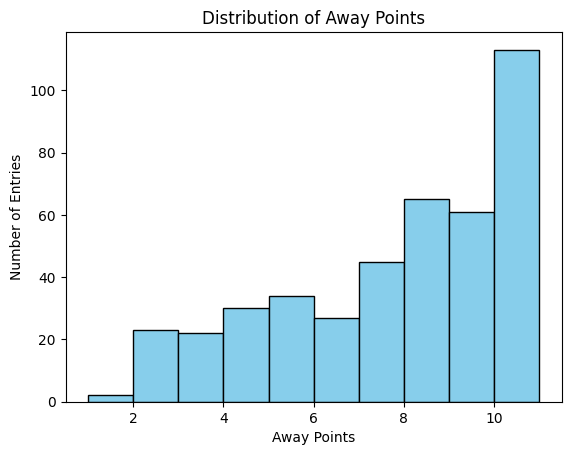

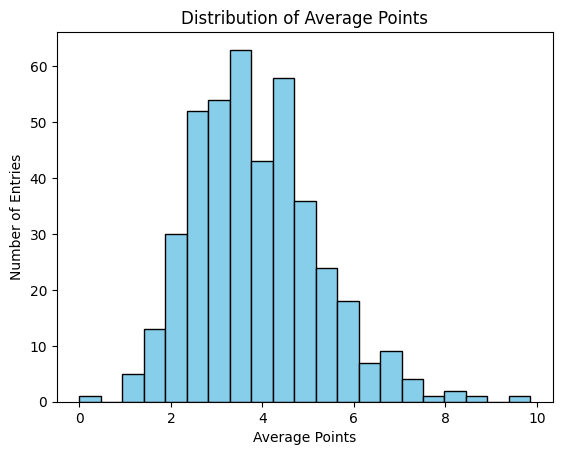

In [58]:
df_14 = df[df['Date'] == latest_date]

# Plot Points distribution
plt.hist(df_14['Points'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Price distribution
plt.hist(df_14['Price'], bins="auto", color='salmon', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Number of Entries')
plt.show()

# Plot GP distribution
plt.hist(df_14['GP'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of GP')
plt.xlabel('GP')
plt.ylabel('Number of Entries')
plt.show()

# Plot Home distribution
plt.hist(df_14['Home'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Home Points')
plt.xlabel('Home Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Away distribution
plt.hist(df_14['Home'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Away Points')
plt.xlabel('Away Points')
plt.ylabel('Number of Entries')
plt.show()

# Plot Average distribution
plt.hist(df_14['Average'], bins="auto", color='skyblue', edgecolor='black')
plt.title('Distribution of Average Points')
plt.xlabel('Average Points')
plt.ylabel('Number of Entries')
plt.show()

Skewed, but much more balanced and make more sense. Notice that cumutative columns are now far less skewed or skewed towards the right. This definetly means that are being affected by earlier matchdays unnecesairly. Therefore, to analyze these, it'll probably be better to use `df_14`; as for the price, I should take `df`.

## Correlation

Next step is the correlation overview. Let's take the whole dataset and just eliminate players who haven't played a single game yet.

In [56]:
numeric_cols = ['Points', 'Price', 'GP', 'Home', 'Away', 'Average']
df_numeric = df[numeric_cols]

corr_matrix = df_numeric.corr()
print(corr_matrix)

           Points     Price        GP      Home      Away   Average
Points   1.000000  0.601736  0.847753  0.825005  0.813773  0.668300
Price    0.601736  1.000000  0.289099  0.288918  0.269917  0.690075
GP       0.847753  0.289099  1.000000  0.966633  0.966468  0.327177
Home     0.825005  0.288918  0.966633  1.000000  0.868440  0.324637
Away     0.813773  0.269917  0.966468  0.868440  1.000000  0.307808
Average  0.668300  0.690075  0.327177  0.324637  0.307808  1.000000


Now let's do the same for the latest matchday dataset:

In [57]:
df_14_numeric = df_14[numeric_cols]
corr_matrix = df_14_numeric.corr()
print(corr_matrix)

           Points     Price        GP      Home      Away   Average
Points   1.000000  0.824976  0.793704  0.767306  0.744352  0.869805
Price    0.824976  1.000000  0.491398  0.490261  0.445836  0.801271
GP       0.793704  0.491398  1.000000  0.951530  0.952831  0.446257
Home     0.767306  0.490261  0.951530  1.000000  0.813302  0.440793
Away     0.744352  0.445836  0.952831  0.813302  1.000000  0.409254
Average  0.869805  0.801271  0.446257  0.440793  0.409254  1.000000


### Key insights

1. The correlation between Price and Points is much higher in `df_14`. This could be because the current price is closer in time to the latest performance, whereas in `df` is a general view.

2. For `df`, the highest correlation for Price happens with Average, not with Points; maybe it's caused by the fact that Average contains more information about the global performance.

3. Home and Away points are very correlated, stating that good performers would usually do well despite the stadium.

4. GP is highly correlated to Points, Home, and Away, but not to Average.

5. Price does not have a considerable correlation with GP, Home, or Away in `df`.

## Questions

Now that we're done with the EDA, let's move on to some questions this dataset could answer using Machine Learning.

1. Does performance vary across teams?
2. Can performance features + price group players by position?
3. What features are better to predict Price?

## Does performance vary across teams?

To answer this, we will perform an ANOVA test, which will tell us if the means of performance features vary significantly across teams.

Let's first check the assumptions necessary for the test: normality, with Shapiro-Wilk test, and similar variancies, with Levene's test; since both tests need continous data, we will use Average as our performance feature. I'll use `df_14` because it captures performance features better.

In [60]:
from scipy.stats import f_oneway, levene, shapiro

teams = df_14['Team'].unique()

# Group data by team
grouped_data = [df_14[df_14['Team'] == team]['Average'] for team in teams]

# 1a. Normality test (Shapiro-Wilk) per team
for team, data in zip(teams, grouped_data):
    stat, p = shapiro(data)
    print(f"{team}: Shapiro-Wilk p = {p:.3f}")

# 1b. Homogeneity of variances (Levene's test)
stat, p = levene(*grouped_data)
print(f"Levene test p = {p:.3f}")

Manchester City: Shapiro-Wilk p = 0.254
Newcastle: Shapiro-Wilk p = 0.007
Arsenal: Shapiro-Wilk p = 0.453
Manchester United: Shapiro-Wilk p = 0.058
Brentford FC: Shapiro-Wilk p = 0.481
Brighton & Hove Albion: Shapiro-Wilk p = 0.048
Sunderland: Shapiro-Wilk p = 0.389
Fulham: Shapiro-Wilk p = 0.917
Chelsea: Shapiro-Wilk p = 0.634
Everton: Shapiro-Wilk p = 0.231
Liverpool: Shapiro-Wilk p = 0.450
Nottingham Forest: Shapiro-Wilk p = 0.844
Crystal Palace: Shapiro-Wilk p = 0.226
Tottenham: Shapiro-Wilk p = 0.727
AFC Bournemouth: Shapiro-Wilk p = 0.177
West Ham United: Shapiro-Wilk p = 0.878
Aston Villa: Shapiro-Wilk p = 0.200
Leeds United: Shapiro-Wilk p = 0.190
Burnley: Shapiro-Wilk p = 0.160
Wolverhampton: Shapiro-Wilk p = 0.598
Levene test p = 0.110


Only Newcastle and Brighton fail the normality test, but we will proceed anyway as it's only two teams.

In [61]:
anova_result = f_oneway(*grouped_data)
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

F-statistic: 2.8214461432867473
p-value: 8.214371471092064e-05


The F-statistic indicates the variance of means across teams is 2.82 times larger than the variance across players from the same team. The p-value clearly rejects that means across teams are equal. 

Therefore, performance depends on the team. 

Let's do a quick visualization of which teams perform better:

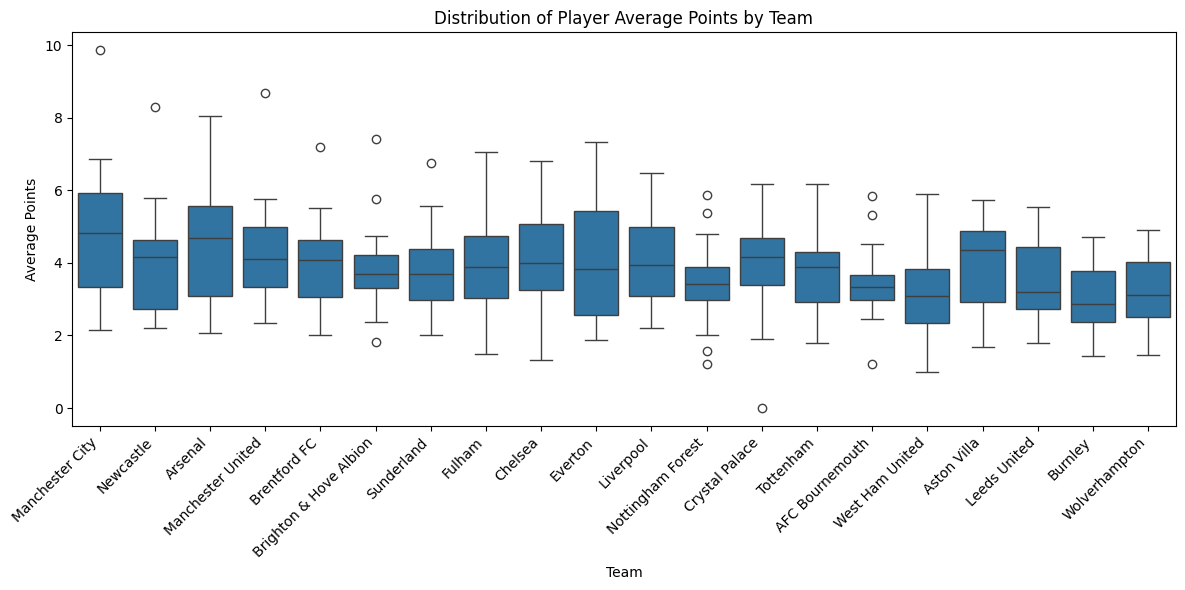

In [62]:
import seaborn as sns

# Make a boxplot of Average points by Team
plt.figure(figsize=(12,6))
sns.boxplot(x='Team', y='Average', data=df_14)
plt.xticks(rotation=45, ha='right')  # Rotate team names for readability
plt.title('Distribution of Player Average Points by Team')
plt.ylabel('Average Points')
plt.xlabel('Team')
plt.tight_layout()
plt.show()

### Some insights

1. Outperformers are much more common in mid-table teams. 

2. Manchester City and Aston Villa have the strongest performers (highest median). Arsenal is a close second. 

3. West Ham is terrible.

4. Only three outperformers are better than Arsenal's best player.

## Can performance + price features group players by position?

### K-nearest neighbours

First, I'll try a supervised method: K-nearest neighbours, as it works well with fewer features and not a huge sample. The features included will be Price, Average, and Home; Away is discarded because its correlation with Home is too high. Once again I'll use `df_14`.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

Let's first find the optimal `k`:

In [72]:
features = ['Average', 'Price', "Home"]
target = 'Position'

X = df_14[features]
y = df_14[target]

# Split into train/test; 0.2 as the dataset is only 422 rows large; y as the split is categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding the optimal k
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = k_range[np.argmax(cv_scores)]
print("Optimal k:", optimal_k)

Optimal k: 2


In [71]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[25  2  2  1]
 [12  7  0  5]
 [ 5  1  0  0]
 [19  3  2  1]]

Classification Report:
               precision    recall  f1-score   support

    Defender       0.41      0.83      0.55        30
     Forward       0.54      0.29      0.38        24
  Goalkeeper       0.00      0.00      0.00         6
  Midfielder       0.14      0.04      0.06        25

    accuracy                           0.39        85
   macro avg       0.27      0.29      0.25        85
weighted avg       0.34      0.39      0.32        85



Not great, honestly. It can't identify goalkeepers. Let's try a logistic regression.

### Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    multi_class='multinomial',  # handle multi-class
    solver='lbfgs',             # suitable for small/medium datasets
    max_iter=1000,
    class_weight = "balanced",
    random_state=42
)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[11  8  7  4]
 [ 2  6 12  4]
 [ 1  4  1  0]
 [ 8  4 11  2]]

Classification Report:
               precision    recall  f1-score   support

    Defender       0.50      0.37      0.42        30
     Forward       0.27      0.25      0.26        24
  Goalkeeper       0.03      0.17      0.05         6
  Midfielder       0.20      0.08      0.11        25

    accuracy                           0.24        85
   macro avg       0.25      0.22      0.21        85
weighted avg       0.31      0.24      0.26        85



/home/diego/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Simpler was worse this time. Let's try Random Forest for the sake of exploring more methods.

### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

In [80]:
#classes = np.unique(y_train)
#weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
#class_weights = dict(zip(classes, weights))

rf = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=None,          # None = expand until all leaves are pure or contain < min_samples_split
    random_state=42,
    #class_weight=class_weights
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[16  5  3  6]
 [ 7  7  1  9]
 [ 3  0  0  3]
 [12  6  3  4]]

Classification Report:
               precision    recall  f1-score   support

    Defender       0.42      0.53      0.47        30
     Forward       0.39      0.29      0.33        24
  Goalkeeper       0.00      0.00      0.00         6
  Midfielder       0.18      0.16      0.17        25

    accuracy                           0.32        85
   macro avg       0.25      0.25      0.24        85
weighted avg       0.31      0.32      0.31        85



In [ ]:
KNN was the most 